In [32]:
# Used to autoformat
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Exploratory Data Analysis

## Introduction

We are going to look at the following for each special:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [33]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle("dtm.pkl")
data = data.transpose()
data.head()

,age_spin,deep_texas,equanimity,killin_softly,stick_stones,the_bird_revelation,worth
aaaah,0,0,0,0,1,0,0
aaah,1,0,0,0,0,0,0
aah,0,0,0,0,2,0,0
aand,0,0,0,0,2,0,0
abandon,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [34]:
# Find the top 30 words said in each special
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'age_spin': [('like', 103),
  ('know', 79),
  ('said', 63),
  ('just', 61),
  ('im', 47),
  ('shit', 45),
  ('people', 43),
  ('didnt', 39),
  ('ahah', 38),
  ('dont', 38),
  ('time', 36),
  ('thats', 33),
  ('fuck', 33),
  ('fucking', 32),
  ('black', 31),
  ('man', 30),
  ('got', 27),
  ('good', 27),
  ('right', 22),
  ('gonna', 21),
  ('gay', 20),
  ('nigga', 20),
  ('lot', 20),
  ('did', 19),
  ('hes', 19),
  ('oj', 18),
  ('oh', 18),
  ('yeah', 18),
  ('come', 17),
  ('guys', 16)],
 'deep_texas': [('like', 130),
  ('just', 95),
  ('know', 83),
  ('im', 83),
  ('said', 82),
  ('dont', 69),
  ('shit', 57),
  ('thats', 44),
  ('right', 43),
  ('ahah', 38),
  ('gonna', 37),
  ('didnt', 34),
  ('got', 33),
  ('pussy', 32),
  ('fuck', 31),
  ('man', 30),
  ('oh', 29),
  ('fucking', 28),
  ('youre', 27),
  ('guy', 26),
  ('good', 26),
  ('people', 25),
  ('say', 25),
  ('want', 25),
  ('time', 25),
  ('think', 24),
  ('black', 23),
  ('dave', 22),
  ('tell', 21),
  ('hes', 19)],
 'equan

<IPython.core.display.Javascript object>

In [35]:
# Print the top 15 words in each special
for special, top_words in top_dict.items():
    print(special)
    print(", ".join([word for word, count in top_words[0:14]]))
    print("---")

age_spin
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
---
deep_texas
like, just, know, im, said, dont, shit, thats, right, ahah, gonna, didnt, got, pussy
---
equanimity
like, im, know, just, said, dont, shit, people, nigga, gonna, thats, white, didnt, motherfucker
---
killin_softly
like, know, im, shit, just, thats, dont, man, right, mean, say, talk, black, come
---
stick_stones
like, know, im, just, dont, said, got, shit, thats, say, nigga, right, uh, gonna
---
the_bird_revelation
know, like, im, thats, just, dont, right, shit, said, got, bitch, man, nigga, didnt
---
worth
im, like, shit, thats, dont, just, know, man, people, got, said, motherfucker, fuck, time
---


<IPython.core.display.Javascript object>

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [36]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each special
words = []
for special in data.columns:
    top = [word for (word, count) in top_dict[special]]
    for t in top:
        words.append(t)

words

['like',
 'know',
 'said',
 'just',
 'im',
 'shit',
 'people',
 'didnt',
 'ahah',
 'dont',
 'time',
 'thats',
 'fuck',
 'fucking',
 'black',
 'man',
 'got',
 'good',
 'right',
 'gonna',
 'gay',
 'nigga',
 'lot',
 'did',
 'hes',
 'oj',
 'oh',
 'yeah',
 'come',
 'guys',
 'like',
 'just',
 'know',
 'im',
 'said',
 'dont',
 'shit',
 'thats',
 'right',
 'ahah',
 'gonna',
 'didnt',
 'got',
 'pussy',
 'fuck',
 'man',
 'oh',
 'fucking',
 'youre',
 'guy',
 'good',
 'people',
 'say',
 'want',
 'time',
 'think',
 'black',
 'dave',
 'tell',
 'hes',
 'like',
 'im',
 'know',
 'just',
 'said',
 'dont',
 'shit',
 'people',
 'nigga',
 'gonna',
 'thats',
 'white',
 'didnt',
 'motherfucker',
 'feel',
 'say',
 'time',
 'man',
 'fuck',
 'bad',
 'right',
 'got',
 'fucking',
 'good',
 'everybody',
 'cause',
 'yo',
 'want',
 'make',
 'bitch',
 'like',
 'know',
 'im',
 'shit',
 'just',
 'thats',
 'dont',
 'man',
 'right',
 'mean',
 'say',
 'talk',
 'black',
 'come',
 'white',
 'got',
 'good',
 'gonna',
 'oh',


<IPython.core.display.Javascript object>

In [37]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 7),
 ('know', 7),
 ('said', 7),
 ('just', 7),
 ('im', 7),
 ('shit', 7),
 ('dont', 7),
 ('thats', 7),
 ('fuck', 7),
 ('man', 7),
 ('got', 7),
 ('right', 7),
 ('people', 6),
 ('didnt', 6),
 ('gonna', 6),
 ('say', 6),
 ('time', 5),
 ('black', 5),
 ('good', 5),
 ('oh', 5),
 ('want', 5),
 ('fucking', 4),
 ('nigga', 4),
 ('did', 4),
 ('hes', 4),
 ('youre', 4),
 ('white', 4),
 ('come', 3),
 ('think', 3),
 ('tell', 3),
 ('motherfucker', 3),
 ('mean', 3),
 ('ahah', 2),
 ('guy', 2),
 ('everybody', 2),
 ('cause', 2),
 ('bitch', 2),
 ('going', 2),
 ('gay', 1),
 ('lot', 1),
 ('oj', 1),
 ('yeah', 1),
 ('guys', 1),
 ('pussy', 1),
 ('dave', 1),
 ('feel', 1),
 ('bad', 1),
 ('yo', 1),
 ('make', 1),
 ('talk', 1),
 ('ill', 1),
 ('thing', 1),
 ('baby', 1),
 ('gotta', 1),
 ('uh', 1),
 ('school', 1),
 ('okay', 1),
 ('way', 1),
 ('iceberg', 1),
 ('money', 1),
 ('wanna', 1),
 ('nigger', 1),
 ('god', 1),
 ('ive', 1)]

<IPython.core.display.Javascript object>

In [38]:
# If more than 4 of the specials have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
add_stop_words

['like',
 'know',
 'said',
 'just',
 'im',
 'shit',
 'dont',
 'thats',
 'fuck',
 'man',
 'got',
 'right',
 'people',
 'didnt',
 'gonna',
 'say']

<IPython.core.display.Javascript object>

In [39]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle("data_clean.pkl")

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle

pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

<IPython.core.display.Javascript object>

In [41]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(
    stopwords=stop_words,
    background_color="white",
    colormap="coolwarm_r",
    max_font_size=150,
    random_state=42,
)

<IPython.core.display.Javascript object>

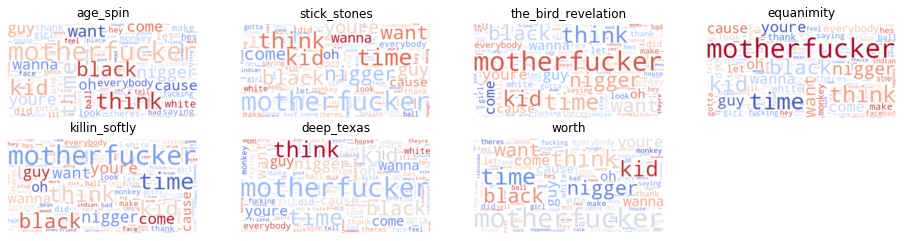

<IPython.core.display.Javascript object>

In [55]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16, 6]

full_names = [
    "age_spin",
    "stick_stones",
    "the_bird_revelation",
    "equanimity",
    "killin_softly",
    "deep_texas",
    "worth",
]
# Create subplots for each special
for index, special in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(3, 4, index + 1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])

plt.show()

### Findings

* Chapelle uses the n-word, which to many is controversial but I think that is why people graviate towards him so much because he is willing to cross the line. 

* He also speaks alot on racial issues 
* Him and Samuel L both love using motherfucker 

## Number of Words

### Analysis

In [56]:
# Find the number of unique words in each special

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for special in data.columns:
    uniques = data[special].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(
    list(zip(full_names, unique_list)), columns=["special", "unique_words"]
)
data_unique_sort = data_words.sort_values(by="unique_words")
data_unique_sort

C:\Users\Kwasi\Anaconda3\envs\Thinkful\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


,special,unique_words
3,equanimity,1061
5,deep_texas,1130
6,worth,1212
4,killin_softly,1232
2,the_bird_revelation,1270
1,stick_stones,1320
0,age_spin,1404


<IPython.core.display.Javascript object>

In [57]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for special in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB, in minutes
run_times = [67, 65, 49, 60, 57, 66, 60]

# Let's add some columns to our dataframe
data_words["total_words"] = total_list
data_words["run_times"] = run_times
data_words["words_per_minute"] = data_words["total_words"] / data_words["run_times"]

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by="words_per_minute")
data_wpm_sort

,special,unique_words,total_words,run_times,words_per_minute
0,age_spin,1404,3671,67,54.791045
5,deep_texas,1130,3671,66,55.621212
1,stick_stones,1320,3671,65,56.476923
3,equanimity,1061,3671,60,61.183333
6,worth,1212,3671,60,61.183333
4,killin_softly,1232,3671,57,64.403509
2,the_bird_revelation,1270,3671,49,74.918367


<IPython.core.display.Javascript object>

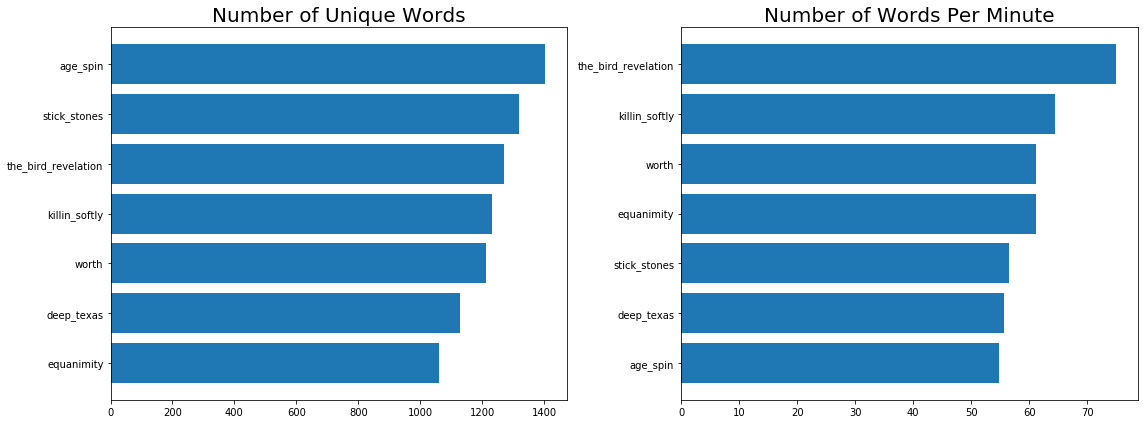

<IPython.core.display.Javascript object>

In [58]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align="center")
plt.yticks(y_pos, data_unique_sort.special)
plt.title("Number of Unique Words", fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align="center")
plt.yticks(y_pos, data_wpm_sort.special)
plt.title("Number of Words Per Minute", fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Age of spin had the highest number of unique words, and knowing Chappelle's style this might just be more of a look at the range of topics that he covers. More than anything else. 


* **Talking Speed**
   * The standup in texas was one outlier other than that he normally sits comfortably in the 60s with words per minute with the one exception being the_bird_revaltion. But its close enough that I wouldnt consider it an outlier.  

## Amount of Profanity

### Analysis

In [59]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 7),
 ('know', 7),
 ('said', 7),
 ('just', 7),
 ('im', 7),
 ('shit', 7),
 ('dont', 7),
 ('thats', 7),
 ('fuck', 7),
 ('man', 7),
 ('got', 7),
 ('right', 7),
 ('people', 6),
 ('didnt', 6),
 ('gonna', 6),
 ('say', 6),
 ('time', 5),
 ('black', 5),
 ('good', 5),
 ('oh', 5),
 ('want', 5),
 ('fucking', 4),
 ('nigga', 4),
 ('did', 4),
 ('hes', 4),
 ('youre', 4),
 ('white', 4),
 ('come', 3),
 ('think', 3),
 ('tell', 3),
 ('motherfucker', 3),
 ('mean', 3),
 ('ahah', 2),
 ('guy', 2),
 ('everybody', 2),
 ('cause', 2),
 ('bitch', 2),
 ('going', 2),
 ('gay', 1),
 ('lot', 1),
 ('oj', 1),
 ('yeah', 1),
 ('guys', 1),
 ('pussy', 1),
 ('dave', 1),
 ('feel', 1),
 ('bad', 1),
 ('yo', 1),
 ('make', 1),
 ('talk', 1),
 ('ill', 1),
 ('thing', 1),
 ('baby', 1),
 ('gotta', 1),
 ('uh', 1),
 ('school', 1),
 ('okay', 1),
 ('way', 1),
 ('iceberg', 1),
 ('money', 1),
 ('wanna', 1),
 ('nigger', 1),
 ('god', 1),
 ('ive', 1)]

<IPython.core.display.Javascript object>

In [60]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[["fucking", "fuck", "shit", "motherfucker"]]
data_profanity = pd.concat(
    [
        data_bad_words.fucking + data_bad_words.fuck,
        data_bad_words.shit,
        data_bad_words.motherfucker,
    ],
    axis=1,
)
data_profanity.columns = ["f_word", "s_word", "mf"]
data_profanity

,f_word,s_word,mf
age_spin,65,45,10
deep_texas,59,57,14
equanimity,36,46,22
killin_softly,40,63,2
stick_stones,34,34,12
the_bird_revelation,28,33,15
worth,41,62,30


<IPython.core.display.Javascript object>

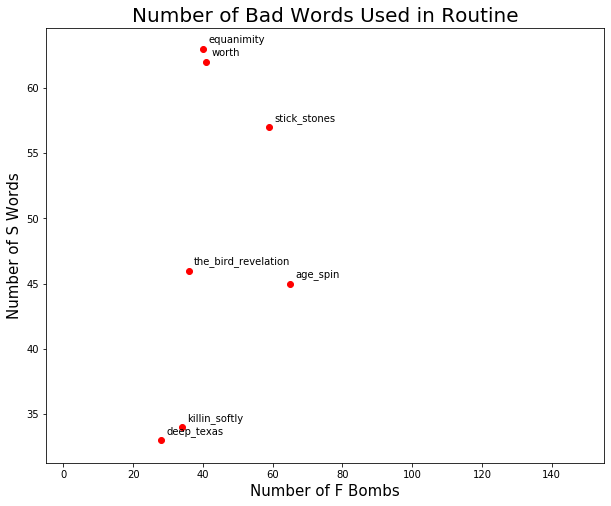

<IPython.core.display.Javascript object>

In [61]:
# Let's create a scatter plot of our findings
plt.rcParams["figure.figsize"] = [10, 8]

for i, special in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[special]
    y = data_profanity.s_word.loc[special]
    plt.scatter(x, y, color="red")
    plt.text(x + 1.5, y + 0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title("Number of Bad Words Used in Routine", fontsize=20)
plt.xlabel("Number of F Bombs", fontsize=15)
plt.ylabel("Number of S Words", fontsize=15)

plt.show()

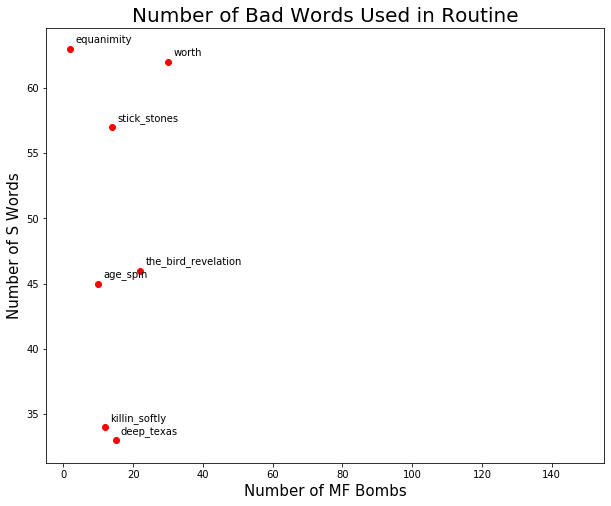

<IPython.core.display.Javascript object>

In [62]:
# Let's create a scatter plot of our findings
plt.rcParams["figure.figsize"] = [10, 8]

for i, special in enumerate(data_profanity.index):
    x = data_profanity.mf.loc[special]
    y = data_profanity.s_word.loc[special]
    plt.scatter(x, y, color="red")
    plt.text(x + 1.5, y + 0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title("Number of Bad Words Used in Routine", fontsize=20)
plt.xlabel("Number of MF Bombs", fontsize=15)
plt.ylabel("Number of S Words", fontsize=15)

plt.show()

### Findings


* **Humor** - Chapellle's humor is not PC and personally that's what I love about it. 

## Conclusions

Through this process there have been definitely some assumptions that I have confirmed about Chappelle's comedy. This process of data exploration can go on even longer but right now this is more than enough. 